#  ML Prediction: Predict food delivery time

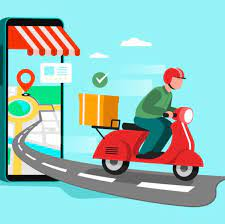

The goal is to see if we can predict food delivery time. We will perform some visualizations before we go on to pre-process the data, after which we will implement Regression models.

Setting Up


Data Processing and Visualization Modules

Numpy
Pandas
Seaborn
Matplotlib

Machine Learning Modules

Train test split
Multiple Linear Regression
Random Forest Regressor
cross validation score
Root Mean Squared Error Percentage(RMSE%)
r2_score

Dataset Info()                                                      
Restaurant: A unique ID that represents a restaurant.                                                
Location: The location of the restaurant.                                                    
Cuisines: The cuisines offered by the restaurant.                                                             
Average_Cost: The average cost for one person/order.                                                       
Minimum_Order: The minimum order amount.                                                                     
Rating: Customer rating for the restaurant.
Votes: The total number of customer votes for the restaurant.                                                       
Reviews: The number of customer reviews for the restaurant.                                                         
Delivery_Time: The order delivery time of the restaurant.                                                   

In [1]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('/home/hussain/Downloads/Regression_projects/food delivery time/Data_Train.csv')
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
df.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes
11093,ID_4417,"Sector 63A,Gurgaon",North Indian,₹100,₹50,NEW,-,-,30 minutes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [5]:
df.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [6]:
df.isna().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [7]:
df['Cuisines'].unique()

array(['Fast Food, Rolls, Burger, Salad, Wraps', 'Ice Cream, Desserts',
       'Italian, Street Food, Fast Food', ...,
       'North Indian, Mughlai, Kebab, Chinese',
       'Chinese, Seafood, Asian, North Indian',
       'Tibetan, Chinese, Continental, Momos'], dtype=object)

In [8]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [9]:
df['Cuisines'].value_counts().head(20)

North Indian                        850
North Indian, Chinese               614
Fast Food                           434
South Indian                        270
Chinese                             245
Street Food                         181
Bakery, Desserts                    171
Bakery                              168
North Indian, Mughlai               155
Pizza, Fast Food                    133
Chinese, North Indian               125
Fast Food, Beverages                114
North Indian, Fast Food             113
North Indian, Chinese, Fast Food    104
Biryani                             103
Desserts                            100
Biryani, North Indian                89
Desserts, Beverages                  89
North Indian, Mughlai, Chinese       83
North Indian, Chinese, Mughlai       78
Name: Cuisines, dtype: int64

Text(0, 0.5, 'Cuisines')

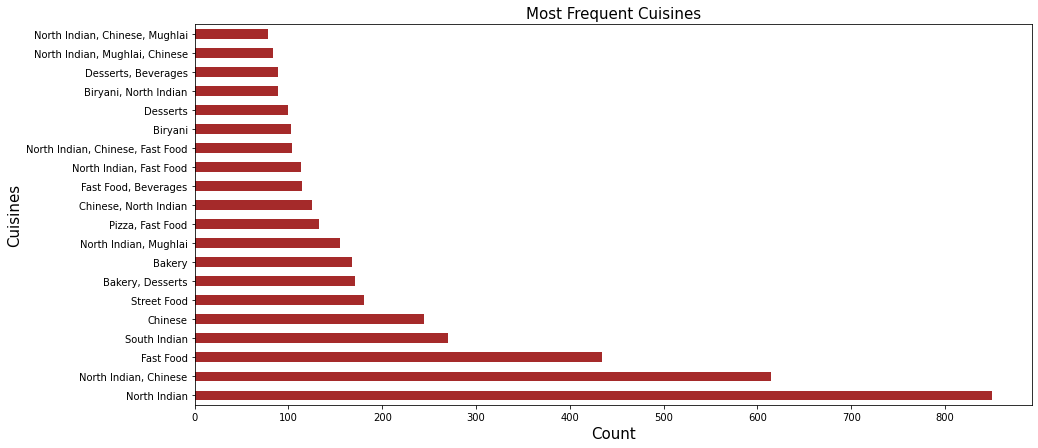

In [10]:
plt.figure(figsize=(15,7))
df_cuisine=df['Cuisines'].value_counts().head(20).sort_values(ascending=False)
df_cuisine.plot(kind='barh',color='brown')
plt.title('Most Frequent Cuisines',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Cuisines',fontsize=15)

In [11]:
df['Average_Cost'].value_counts().head(20)

₹200      3241
₹100      2557
₹150      2462
₹250       881
₹300       537
₹350       283
₹400       282
₹50        265
₹600       154
₹500       101
₹450        63
₹550        60
₹650        55
₹800        44
₹750        38
₹700        15
₹900        15
₹850        12
₹1,000      12
₹1,200       8
Name: Average_Cost, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7c9ebe7da0>,
 [Text(0.667688201272101, 0.8741810258075993, '₹200'),
  Text(-0.9201959825390964, 0.60269341602419, '₹100'),
  Text(-0.7320966727693693, -0.8209960180902336, '₹150'),
  Text(0.23921210804049897, -1.073674795907411, '₹250'),
  Text(0.6401155647473932, -0.8945680878324053, '₹300'),
  Text(0.8289351036947185, -0.7230951485542042, '₹350'),
  Text(0.9336230371938022, -0.5816769072440647, '₹400'),
  Text(1.012240391725725, -0.43054545562454954, '₹50'),
  Text(1.0561184278634603, -0.30759367081787164, '₹600'),
  Text(1.0755719066520943, -0.23053215311704053, '₹500'),
  Text(1.0851214087824494, -0.18030953441788006, '₹450'),
  Text(1.090746369945065, -0.14238102560265306, '₹550'),
  Text(1.0948067737796925, -0.10676201612044053, '₹650'),
  Text(1.0973709576420418, -0.07600645580336066, '₹800'),
  Text(1.0988408364409676, -0.050485801664574954, '₹750'),
  Text(1.099475181159131, -0.03397537365645876, '₹700'),
  Text(1.0997243062111832, -0.0246262

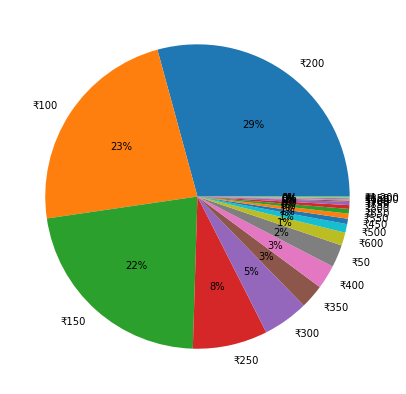

In [12]:

plt.figure(figsize=(15,7))
df_average_cost=df['Average_Cost'].value_counts().head(20).sort_values(ascending=False)

plt.pie(x=df_average_cost.values,labels=df_average_cost.index,autopct='%1.0f%%')

In [13]:
df['Location'].value_counts().head(15)

Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Name: Location, dtype: int64

<AxesSubplot:>

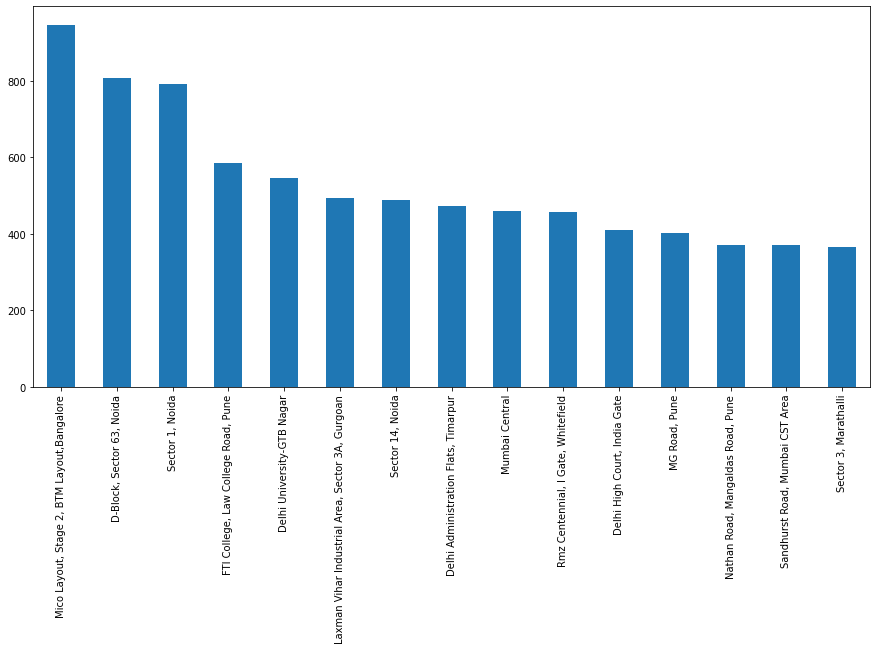

In [14]:
plt.figure(figsize=(15,7))
df_location=df['Location'].value_counts().head(15).sort_values(ascending=False)
df_location.plot(kind='bar')

In [15]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


([<matplotlib.patches.Wedge at 0x7f02c3c29208>,
 [Text(1.0348345800655985, 0.3729844392202665, '-'),
  Text(0.6449601575937003, 0.8910815872391874, '3.7'),
  Text(0.1408330659988696, 1.0909473165654509, '3.6'),
  Text(-0.38228700501568125, 1.0314342663476623, '3.5'),
  Text(-0.8079282080301156, 0.7464931417429409, '3.8'),
  Text(-1.0530046339660157, 0.3180899885977193, 'NEW'),
  Text(-1.0885583877118499, -0.1582423348607388, '3.9'),
  Text(-0.9258183580914988, -0.5940205112795024, '3.4'),
  Text(-0.6172237367556406, -0.9105135137851628, '3.3'),
  Text(-0.24147899525747454, -1.0731672259482399, '4.0'),
  Text(0.11576501837041282, -1.0938914299516649, '3.2'),
  Text(0.4153368583776329, -1.0185751293218377, '4.1'),
  Text(0.6568079519934785, -0.8823850147175736, '3.1'),
  Text(0.8242087069247626, -0.7284778702400033, '3.0'),
  Text(0.9336721708690018, -0.5815980376039501, '4.2'),
  Text(1.010426314063635, -0.4347857677612927, '4.3'),
  Text(1.0581264066076985, -0.3006135519890605, '2.9'),

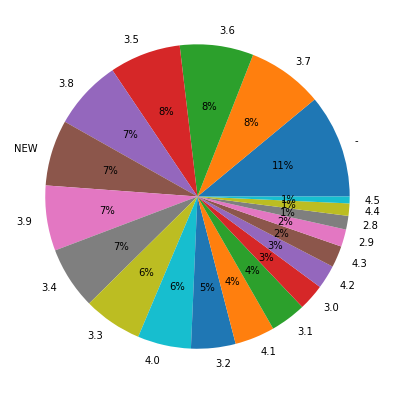

In [227]:
plt.figure(figsize=(15,7))
df_cuisine=df['Rating'].value_counts().head(20).sort_values(ascending=False)

plt.pie(x=df_cuisine.values,labels=df_cuisine.index,autopct='%1.0f%%')

In [163]:
df['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          947
D-Block, Sector 63, Noida                           806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi University-GTB Nagar                          545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370
Sector 3, Marathalli                                366
Majestic                                            334
Delhi Cantt.                                        326
Yerawada, Pune, Maharashtra                     

In [164]:
df_location=pd.get_dummies(df,columns=['Location'])
df_location.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,"Location_BTM Layout 1, Electronic City","Location_Babarpur, New Delhi, Delhi",...,"Location_Raja Bazar, Kolkata","Location_Rmz Centennial, I Gate, Whitefield","Location_Sandhurst Road, Mumbai CST Area","Location_Sector 1, Noida","Location_Sector 14, Noida","Location_Sector 3, Marathalli","Location_Sector 63A,Gurgaon","Location_Tejas Nagar Colony, Wadala West, Mumbai","Location_Tiretti, Kolkata","Location_Yerawada, Pune, Maharashtra"
0,ID_6321,"Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_2882,"Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ID_1595,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_5929,"Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,0,0,...,0,0,0,1,0,0,0,0,0,0
4,ID_6123,"Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,0,0,...,0,1,0,0,0,0,0,0,0,0


In [165]:
df_location.columns

Index(['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order', 'Rating',
       'Votes', 'Reviews', 'Delivery_Time',
       'Location_BTM Layout 1, Electronic City',
       'Location_Babarpur, New Delhi, Delhi',
       'Location_Chandni Chowk, Kolkata',
       'Location_Chatta Bazaar, Malakpet, Hyderabad',
       'Location_D-Block, Sector 63, Noida',
       'Location_Delhi Administration Flats, Timarpur',
       'Location_Delhi Cantt.', 'Location_Delhi High Court, India Gate',
       'Location_Delhi University-GTB Nagar',
       'Location_Dockyard Road, Mumbai CST Area',
       'Location_FTI College, Law College Road, Pune',
       'Location_Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'Location_Hyderabad Public School, Begumpet',
       'Location_Jaya Nagar, Saidabad, Hyderabad',
       'Location_Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Location_MG Road, Pune', 'Location_Majestic',
       'Location_Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Locati

In [166]:
df['Cuisines'].value_counts()

North Indian                            850
North Indian, Chinese                   614
Fast Food                               434
South Indian                            270
Chinese                                 245
                                       ... 
Andhra, South Indian, Hyderabadi          1
Fast Food, Tea, Coffee                    1
Arabian, Mediterranean, North Indian      1
Chinese, Thai, Seafood, Momos             1
Cafe, Bakery, Fast Food                   1
Name: Cuisines, Length: 2179, dtype: int64

In [167]:
#For this multi-labeled One-hot Encoding, we need to process commas at strings while making dummies.
#Each cuisine is seperated by ", ".So we seperate each cuisines followed by each comma to differnt columns.
df_cuisines=df['Cuisines'].str.get_dummies(", ")
df_cuisines

,Afghan,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,Bakery,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df_cuisines.columns

Index(['Afghan', 'African', 'American', 'Andhra', 'Arabian', 'Asian',
       'Assamese', 'Awadhi', 'BBQ', 'Bakery',
       ...
       'Street Food', 'Sushi', 'Tamil', 'Tea', 'Tex-Mex', 'Thai', 'Tibetan',
       'Turkish', 'Vietnamese', 'Wraps'],
      dtype='object', length=101)

In [169]:
df['Average_Cost'].unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [170]:
df_average_cost=df[df['Average_Cost']!="for"]
df_average_cost=df_average_cost['Average_Cost'].str.replace("₹","")
df_average_cost=df_average_cost.str.replace(",","")
df_average_cost=df_average_cost.astype(int).reset_index().rename(columns={'Average_Cost':'Average_Cost_new'})
df_average_cost['Average_Cost_new']

0        200
1        100
2        150
3        250
4        200
        ... 
11088    250
11089    100
11090    100
11091    100
11092    100
Name: Average_Cost_new, Length: 11093, dtype: int64

In [171]:
df["Minimum_Order"].unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59'], dtype=object)

In [172]:
df_Minimum_Order=df['Minimum_Order'].str.replace("₹","")
df_Minimum_Order=df_Minimum_Order.astype(int).reset_index().rename(columns={'Minimum_Order':'Minimum_Order_new'})
df_Minimum_Order['Minimum_Order_new']

0        50
1        50
2        50
3        99
4        99
         ..
11089    50
11090    50
11091    50
11092    50
11093    50
Name: Minimum_Order_new, Length: 11094, dtype: int64

In [173]:
df["Rating"].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [174]:
rating_str_val=['-','NEW','Opening Soon','Temporarily Closed']
df_rating=df[~df['Rating'].isin(rating_str_val)]
df_rating=df_rating['Rating'].astype(float)
df_rating

0        3.5
1        3.5
2        3.6
3        3.7
4        3.2
        ... 
11088    3.6
11089    4.2
11090    3.6
11091    3.5
11092    3.1
Name: Rating, Length: 9131, dtype: float64

In [175]:
median=df_rating.median()
median

3.6

In [176]:
df_rating = df.copy()
df_rating.loc[df['Rating'].isin(rating_str_val),'Rating']=str(median)
df_rating["Ratingnew"]=df_rating["Rating"].astype(float)
df_rating["Ratingnew"]

0        3.5
1        3.5
2        3.6
3        3.7
4        3.2
        ... 
11089    4.2
11090    3.6
11091    3.5
11092    3.1
11093    3.6
Name: Ratingnew, Length: 11094, dtype: float64

In [177]:
df['Votes']

0         12
1         11
2         99
3        176
4        521
        ... 
11089    326
11090     36
11091     45
11092     24
11093      -
Name: Votes, Length: 11094, dtype: object

In [178]:
df_votes=df.copy()
df_votes.loc[df['Votes']=='-','Votes']=str(0)
df_votes['Votesnew']=df_votes['Votes'].astype(int)
df_votes['Votesnew']

0         12
1         11
2         99
3        176
4        521
        ... 
11089    326
11090     36
11091     45
11092     24
11093      0
Name: Votesnew, Length: 11094, dtype: int64

In [179]:
df['Reviews']

0          4
1          4
2         30
3         95
4        235
        ... 
11089    189
11090     16
11091     18
11092      9
11093      -
Name: Reviews, Length: 11094, dtype: object

In [180]:
df_reviews=df.copy()
df_reviews.loc[df['Reviews']=='-','Reviews']=str(0)
df_reviews['Reviewsnew']=df_reviews['Reviews'].astype(int)
df_reviews['Reviewsnew']

0          4
1          4
2         30
3         95
4        235
        ... 
11089    189
11090     16
11091     18
11092      9
11093      0
Name: Reviewsnew, Length: 11094, dtype: int64

In [181]:
df['Delivery_Time'].unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [182]:
df_delivery_time=df['Delivery_Time'].str.replace(" minutes","")
df_delivery_time=df_delivery_time.astype(int).reset_index().rename(columns={'Delivery_Time':'Delivery_Time_new'})
df_delivery_time['Delivery_Time_new']

0        30
1        30
2        65
3        30
4        65
         ..
11089    30
11090    30
11091    30
11092    30
11093    30
Name: Delivery_Time_new, Length: 11094, dtype: int64

In [183]:
df_copy=pd.concat([df,df_location],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,"Location_Raja Bazar, Kolkata","Location_Rmz Centennial, I Gate, Whitefield","Location_Sandhurst Road, Mumbai CST Area","Location_Sector 1, Noida","Location_Sector 14, Noida","Location_Sector 3, Marathalli","Location_Sector 63A,Gurgaon","Location_Tejas Nagar Colony, Wadala West, Mumbai","Location_Tiretti, Kolkata","Location_Yerawada, Pune, Maharashtra"
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,0,0,0,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,1,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,1,0,0,0,0,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,1,0,0,0,0,0,0,0,0


In [184]:
df_copy=pd.concat([df_copy,df_cuisines],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Street Food,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,0,0,0,0,1
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,1,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,0,0,0,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,0,0,0,0,0


In [185]:
df_copy=pd.concat([df_copy,df_average_cost['Average_Cost_new']],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,0,0,0,1,200.0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,0,0,0,0,100.0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,0,0,0,0,150.0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,0,0,0,0,250.0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,0,0,0,0,200.0


In [186]:
df_copy=pd.concat([df_copy,df_Minimum_Order['Minimum_Order_new']],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,0,0,1,200.0,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,0,0,0,100.0,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,0,0,0,150.0,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,0,0,0,250.0,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,0,0,0,200.0,99


In [187]:
df_copy=pd.concat([df_copy,df_rating["Ratingnew"]],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,0,1,200.0,50,3.5
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,0,0,100.0,50,3.5
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,0,0,150.0,50,3.6
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,0,0,250.0,99,3.7
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,0,0,200.0,99,3.2


In [188]:
df_copy=pd.concat([df_copy,df_votes['Votesnew']],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew,Votesnew
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,0,1,200.0,50,3.5,12
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,0,100.0,50,3.5,11
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,0,150.0,50,3.6,99
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,0,250.0,99,3.7,176
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,0,200.0,99,3.2,521


In [189]:
df_copy=pd.concat([df_copy,df_reviews['Reviewsnew']],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Thai,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew,Votesnew,Reviewsnew
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,0,1,200.0,50,3.5,12,4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,0,100.0,50,3.5,11,4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,0,150.0,50,3.6,99,30
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,0,250.0,99,3.7,176,95
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,0,200.0,99,3.2,521,235


In [190]:
df_copy=pd.concat([df_copy,df_delivery_time['Delivery_Time_new']],axis=1)
df_copy.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew,Votesnew,Reviewsnew,Delivery_Time_new
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,1,200.0,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,100.0,50,3.5,11,4,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,150.0,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,250.0,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,200.0,99,3.2,521,235,65


In [191]:
df_copy=df_copy.dropna()
df_copy

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Restaurant,...,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew,Votesnew,Reviewsnew,Delivery_Time_new
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,ID_6321,...,0,0,0,1,200.0,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,ID_2882,...,0,0,0,0,100.0,50,3.5,11,4,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,ID_1595,...,0,0,0,0,150.0,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,ID_5929,...,0,0,0,0,250.0,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,ID_6123,...,0,0,0,0,200.0,99,3.2,521,235,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,ID_944,"Rmz Centennial, I Gate, Whitefield","North Indian, Chinese, Biryani",₹150,₹50,3.6,56,18,30 minutes,ID_944,...,0,0,0,0,250.0,50,3.6,56,18,30
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes,ID_8067,...,1,0,0,0,100.0,50,4.2,326,189,30
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes,ID_4620,...,0,0,0,0,100.0,50,3.6,36,16,30
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes,ID_3392,...,0,0,0,0,100.0,50,3.5,45,18,30


In [192]:
df_final=df_copy.drop(['Restaurant','Location','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time'],axis=1)
df_final

,"Location_BTM Layout 1, Electronic City","Location_Babarpur, New Delhi, Delhi","Location_Chandni Chowk, Kolkata","Location_Chatta Bazaar, Malakpet, Hyderabad","Location_D-Block, Sector 63, Noida","Location_Delhi Administration Flats, Timarpur",Location_Delhi Cantt.,"Location_Delhi High Court, India Gate",Location_Delhi University-GTB Nagar,"Location_Dockyard Road, Mumbai CST Area",...,Tibetan,Turkish,Vietnamese,Wraps,Average_Cost_new,Minimum_Order_new,Ratingnew,Votesnew,Reviewsnew,Delivery_Time_new
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,200.0,50,3.5,12,4,30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100.0,50,3.5,11,4,30
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,150.0,50,3.6,99,30,65
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,250.0,99,3.7,176,95,30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,200.0,99,3.2,521,235,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,250.0,50,3.6,56,18,30
11089,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,100.0,50,4.2,326,189,30
11090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100.0,50,3.6,36,16,30
11091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100.0,50,3.5,45,18,30


In [193]:
x=df_final.drop('Delivery_Time_new',axis=1).values
x

array([[ 0. ,  0. ,  0. , ...,  3.5, 12. ,  4. ],
       [ 0. ,  0. ,  0. , ...,  3.5, 11. ,  4. ],
       [ 0. ,  0. ,  0. , ...,  3.6, 99. , 30. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  3.6, 36. , 16. ],
       [ 0. ,  0. ,  0. , ...,  3.5, 45. , 18. ],
       [ 0. ,  0. ,  0. , ...,  3.1, 24. ,  9. ]])

In [194]:
y=df_final['Delivery_Time_new']
y

0        30
1        30
2        65
3        30
4        65
         ..
11088    30
11089    30
11090    30
11091    30
11092    30
Name: Delivery_Time_new, Length: 11093, dtype: int64

In [195]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
xtrain

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 4.100e+00, 3.346e+03,
        1.641e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.600e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.600e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.100e+00, 5.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.400e+00, 9.000e+00,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 1.050e+02,
        7.100e+01]])

In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
forest=RandomForestRegressor(n_estimators=10,random_state=42)
forest.fit(xtrain,ytrain)
ypred1=forest.predict(xtest)
r2score1=r2_score(ytest,ypred1)
r2score1

0.2210195388329047

In [200]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]# Number of trees in random forest
max_features=['auto','sqrt']# Number of features to consider at every split
max_depth=[int(x) for x in np.linspace(5,30,num=6)]# Maximum number of levels in tree
min_samples_split=[2,5,10,15,100]# Minimum number of samples required to split a node
min_samples_leaf=[1,2,5,10]# Minimum number of samples required at each leaf node

In [202]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [203]:
model_random=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [204]:
model_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [205]:
model_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [206]:
ypred_cv=model_random.predict(xtest)

In [208]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
print('MAE%:',mean_absolute_percentage_error(ytest, ypred_cv))
print('MSE:',mean_squared_error(ytest, ypred_cv))
print('RMSE:',np.sqrt(mean_squared_error(ytest, ypred_cv)))
print("R2score" ,r2_score(ytest, ypred_cv))

MAE%: 0.17773234279198785
MSE: 114.48425926304681
RMSE: 10.69973173790104
R2score 0.30633850964987597
